<a href="https://colab.research.google.com/github/anjalbinayak/nn-mnist/blob/master/Handwritten%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Dropout 
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pylab as plt

In [0]:
(x_train , y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()



def prepare_data(x_train, y_train, x_test , y_test , num_pixels , num_classes):
  x_train = np.array(x_train)
  x_test = np.array(x_test)


  x_train = x_train.reshape(60000, num_pixels)
  y_train = tf.keras.utils.to_categorical(y_train)
  x_test = x_test.reshape(10000, 784)
  y_test = tf.keras.utils.to_categorical(y_test)

  return x_train , y_train , x_test , y_test


def normalize(x_train , x_test):
  x_train = x_train / 255
  x_test = x_test / 255

  return x_train , x_test





In [0]:
def create_model():
  model = Sequential([
                    Dense(512 , input_shape=(784,)),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam', loss = 'categorical_crossentropy',
              metrics=['accuracy'])
  return model



In [0]:
num_pixels = 784
num_classes = 10
x_train , y_train , x_test ,  y_test = prepare_data(x_train , y_train , x_test , y_test ,num_pixels , num_classes )
x_train , x_test = normalize(x_train , x_test)

model = create_model()



In [64]:
history = model.fit(x_train,y_train , batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2745 - accuracy: 0.9168 - val_loss: 0.1549 - val_accuracy: 0.9505
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1672 - accuracy: 0.9500 - val_loss: 0.1225 - val_accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1433 - accuracy: 0.9562 - val_loss: 0.1054 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1272 - accuracy: 0.9610 - val_loss: 0.1368 - val_accuracy: 0.9584
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1200 - accuracy: 0.9637 - val_loss: 0.1032 - val_accuracy: 0.9702
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1108 - accuracy: 0.9661 - val_loss: 0.0936 - val_accuracy: 0.9726
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1042 - accuracy: 0.9674 - val_loss: 0.0884 - val_accuracy:

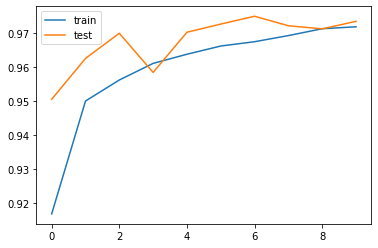

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')


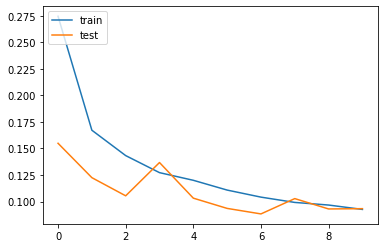

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'], loc='upper left')

In [0]:
#Fun Fact:I would rather , rotate accuraccy graph by 180deg to get loss graph

In [36]:
model.predict(x_train[0].reshape(1,784))

array([[2.0876587e-16, 1.1592992e-07, 6.4070610e-11, 1.9995518e-06,
        7.6747345e-14, 9.9999785e-01, 7.1450312e-15, 2.1514902e-15,
        1.1078965e-10, 9.0947624e-11]], dtype=float32)